# DDA4210 Tutorial 4 - I. Spectral Clustering

## 1. Basic Concepts of Spectral Clustering

### 1.1 Definition

**Conventional Clustering** is based on the compactness of data points, like K-Means, assuming that the points assigned to a cluster are spherical about the cluster centre. This is a strong assumption and may not always be relevant. 

**Spectral Clustering** is based on the connectivity of data points, assuming that the points should be connected, but may not necessarily have convex boundaries. Spectral Clustering uses information from the eigenvalues (spectrum) of special matrices (i.e. Affinity Matrix, Degree Matrix and Laplacian Matrix) derived from the graph or the data set.

### 1.2 Basic Terminologies

**Adjacency Matrix or Similarity Graph (W)**
\begin{equation}
    W = \begin{bmatrix}
        W_{11} & W_{12} & \cdots & W_{1n}\\
        W_{21} & W_{22} & \cdots & W_{2n}\\
        \vdots & \vdots & \ddots & \vdots \\
        W_{n1} & W_{n2} & \cdots & W_{nn}
    \end{bmatrix} \in \mathbb{R}^{n\times n}
\end{equation}
where $W_{ij}$ denotes the similarity value between vertex $i$ and $j$.

1) $\epsilon$-neighborhood graph:
\begin{equation}
W_{ij} = \left\{
\begin{aligned}
    & W_{ij},~\text{if}~W_{ij} \ge \epsilon \\
    & 0,~\text{if}~W_{ij} < \epsilon
\end{aligned}
\right.
\end{equation}

2) $k$-nearest neighbor graph:
\begin{equation}
W_{ij} = \left\{
\begin{aligned}
    & W_{ij},~\text{if $i$ is among the $k$-nearest neighbors of $j$ or if $j$ is among the $k$-nearest neighbors of $i$} \\
    & 0,~\text{otherwise}
\end{aligned}
\right.
\end{equation}

3) mutual $k$-nearest neighbor graph:
\begin{equation}
W_{ij} = \left\{
\begin{aligned}
    & W_{ij},~\text{if both $i$ is among the $k$-nearest neighbors of $j$ and $j$ is among the $k$-nearest neighbors of $i$} \\
    & 0,~\text{otherwise}
\end{aligned}
\right.
\end{equation}

4) fully connected graph: (e.g., Gaussian Kernel Function)
\begin{equation}
    W_{ij} = \exp\left(-\frac{\|x_i-x_j\|^2}{2\sigma^2}\right)
\end{equation}

**Degree Matrix (D)**
\begin{equation}
    D = \begin{bmatrix}
        d_1 & 0 & \cdots & 0 \\
        0 & d_{2} & \cdots & 0 \\
        \vdots & \vdots & \ddots & \vdots \\
        0 & 0 & \cdots & d_{n}
    \end{bmatrix} \in \mathbb{R}^{n\times n}
\end{equation}
where $d_{i} = \sum_{j=1}^n W_{ij}$ denotes the degree of vertex $i$.


**Graph Laplacian Matrix (L)**

1) Unnormalized Laplacian Matrix:
\begin{equation} 
L_{\text{un}} = D-W. 
\end{equation}
$L_{\text{un}}$ is symmetric and positive semi-definite. Specifically, $x^T L_{\text{un}} x = \frac{1}{2} \sum_{i,j=1}^n w_{ij}(x_i-x_j)^2$, for every vector $x \in \mathbb{R}^n$.

2) Normalized Laplacian Matrix (Random Walk):
\begin{equation}
L_{\text{rw}} = D^{-1}L_{\text{un}} = I - D^{-1}W.
\end{equation}
$L_{\text{rw}}$ is unsymmetric and positive semi-definite. $\lambda$ is an eigenvalue of $L_{\text{rw}}$ with eigenvector $u$ if and only if $Lu = \lambda Du$.

3) Normalized Laplacian Matrix (Symmetric):
\begin{equation}
L_{\text{sym}} = D^{-1/2}L_{\text{un}}D^{-1/2} = I - D^{-1/2}WD^{-1/2}.
\end{equation}
$L_{\text{sym}}$ is symmetric and positive semi-definite. 


## 2. Spectral Clustering Algorithm

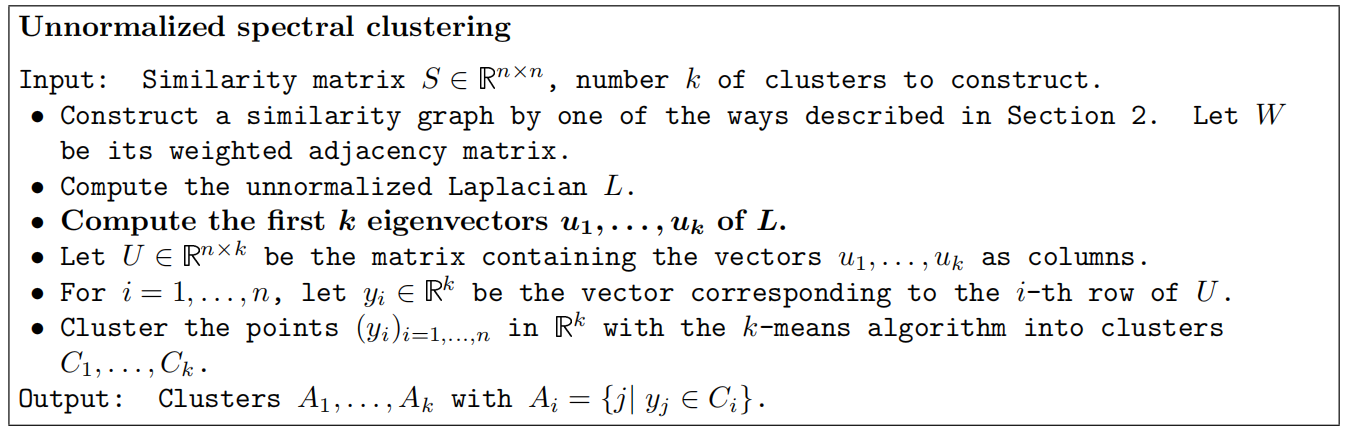

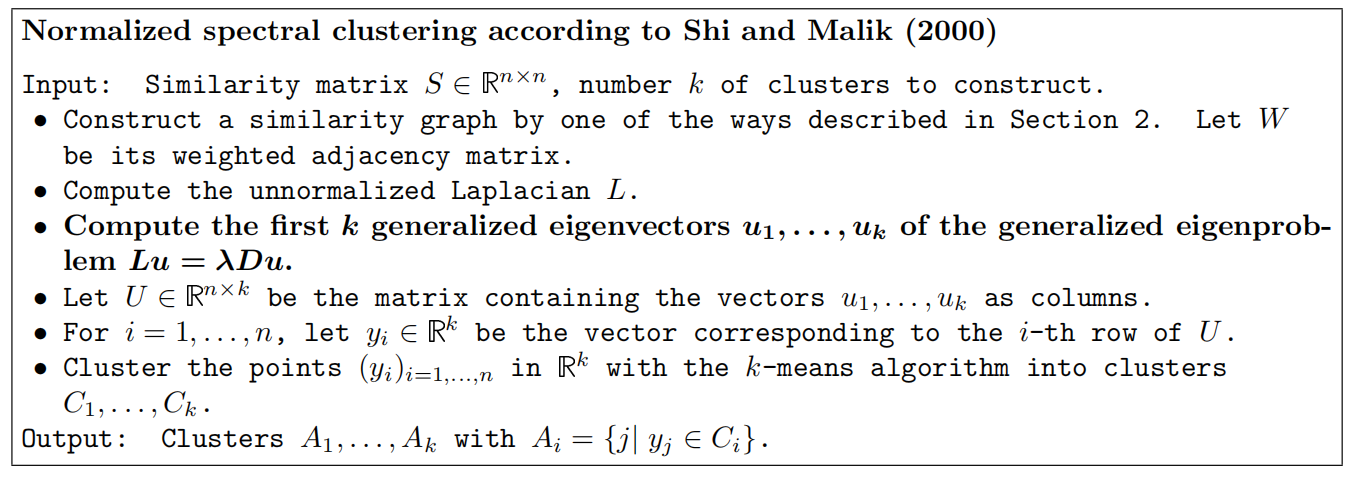

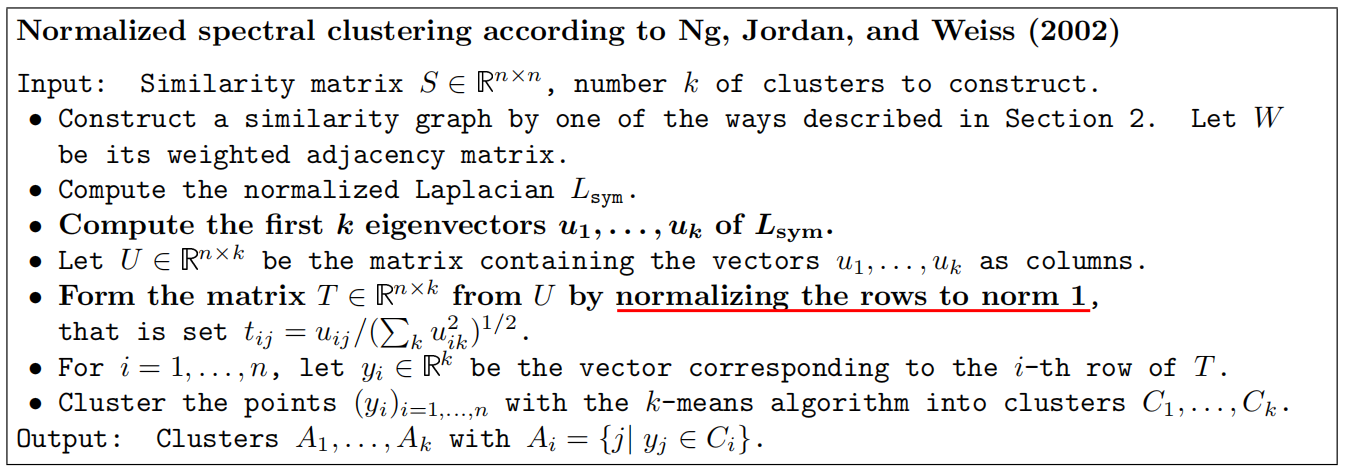

**Note:** "the first $k$ eigenvectors" refer to the eigenvectors corresponding to the $k$ smallest eigenvalues.

**Reference**: Von Luxburg U. A tutorial on spectral clustering. Statistics and Computing, 2007, 17: 395-416.

## 3. Evaluation Metrics for Clustering

**Reference:** https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### 3.1 RI, ARI

The (adjusted or unadjusted) Rand index is a function that measures the similarity of the two assignments, ignoring permutations.

If $C$ is a ground truth class assignment and $K$ the clustering, let us define $a$ and $b$ as:
- $a$ = the number of pairs of elements that are in the same set in $C$ and in the same set in $K$
- $b$ = the number of pairs of elements that are in different sets in $C$ and in different sets in $K$

The unadjusted Rand index (RI) is given by: ($n$ = number of samples)
\begin{equation}
    \text{RI} = \frac{a+b}{C_{n}^{2}} \in [0,1]
\end{equation}

The adjusted Rand index (ARI) is defined as follows:
\begin{equation}
    \text{ARI} = \frac{\text{RI}-\mathbb{E}[\text{RI}]}{\max(\text{RI}) - \mathbb{E}[\text{RI}]} \in [-1,1]
\end{equation}

Lower values indicate different labelings, similar clusterings have a high RI and ARI, 1.0 is the perfect match score. The unadjusted Rand index (RI) is often close to 1.0 even if the clusterings themselves differ significantly, so we often use ARI in practice. 

### 3.2 NMI

The Mutual Information is a function that measures the agreement of the two assignments, ignoring permutations. Normalized Mutual Information (**NMI**) is often used in the literature.

Assume two label assignments (of the same $n$ objects), $C$ and $K$. Their entropy is the amount of uncertainty for a partition set, defined by:
\begin{equation}
    H(C) = -\sum_{i=1}^{|C|} P(i) \log(P(i))
\end{equation}
where $P(i) = |C_i|/n$ is the probability that an object picked at random from $C$ falls into cluster $C_i$. Likewise for $K$:
\begin{equation}
    H(K) = -\sum_{j=1}^{|K|} P'(j) \log(P'(j))
\end{equation}
with $P'(j) = |K_j|/n$. The mutual informaiton (MI) between $C$ and $K$ is calculated by
\begin{equation}
    \text{MI}(C,K) = \sum_{i=1}^{|C|} \sum_{j=1}^{|K|} P(i,j) \log\left( \frac{P(i,j)}{P(i)P'(j)} \right)
\end{equation}
where $P(i,j) = |C_i \cap K_j| / n$ is the probability that an object picked at random falls into both classes $C_i$ and $K_j$. It also can be expressed in set cardinality formulation:
\begin{equation}
    \text{MI}(C,K) = \sum_{i=1}^{|C|} \sum_{j=1}^{|K|} \frac{|C_i \cap K_j|}{n} \log\left( \frac{n|C_i \cap K_j|}{|C_i||K_j|} \right)
\end{equation}
The normalized mutual information is defined as
\begin{equation}
    \text{NMI}(C,K) = \frac{\text{MI}(C,K)}{\text{mean}(H(C), H(K))} \in [0,1]
\end{equation}

In [1]:
from sklearn import metrics

labels_true = [0, 0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2, 2]

ARI = metrics.adjusted_rand_score(labels_true, labels_pred)
NMI = metrics.normalized_mutual_info_score(labels_true, labels_pred)

print(f"ARI={ARI:.2f}, NMI={NMI:.2f}")

ARI=0.24, NMI=0.52


## 4. Clustering Experiments

### 4.1 Datasets

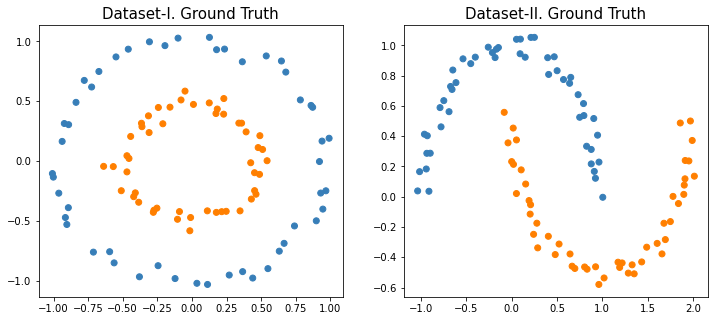

In [2]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# create toy datasets for cluster experiments
noisy_circles = datasets.make_circles(n_samples=100, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=100, noise=0.05)
dataset = [noisy_circles, noisy_moons]

def plot_results(X, y, title):
    # plot with true labels
    plt.title(title,fontsize=15)
    colors = ['#377eb8', '#ff7f00']
    y_colors = [colors[label] for label in y]
    plt.scatter(X[:,0], X[:,1], color=y_colors)
    
X1, Y1 = dataset[0] # Circles
X2, Y2 = dataset[1] # Moons
fig = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_results(X1, Y1, "Dataset-I. Ground Truth")
plt.subplot(1, 2, 2)
plot_results(X2, Y2, "Dataset-II. Ground Truth")
plt.show()

### 4.2 Kmeans Clustering

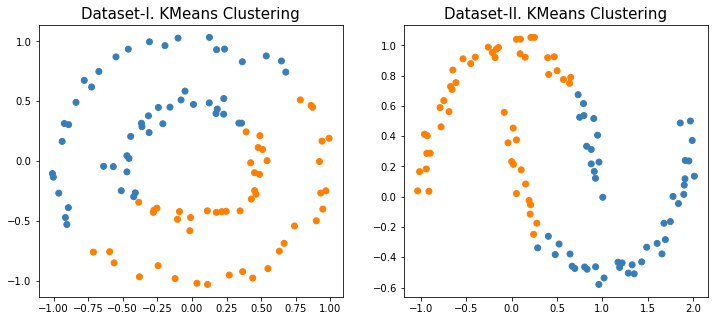

In [3]:
from sklearn.cluster import KMeans

# do Kmeans clustering
km1 = KMeans(n_clusters=2)
km1.fit(X1)
Y1_km = km1.labels_

km2 = KMeans(n_clusters=2)
km2.fit(X2)
Y2_km = km2.labels_

# plot results
fig = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_results(X1, Y1_km, "Dataset-I. KMeans Clustering")
plt.subplot(1, 2, 2)
plot_results(X2, Y2_km, "Dataset-II. KMeans Clustering")
plt.show()

### 4.3 Spectral Clustering

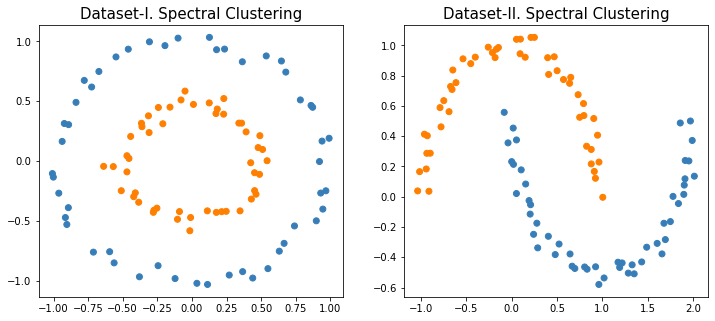

In [4]:
from numpy.linalg import norm
from math import exp

def similarity_matrix(X):
    sigma = 0.01
    # construct similarity matrix
    W = np.zeros((len(X), len(X)))
    for i in range(len(X)-1):
        for j in range(i+1, len(X)):
            # compute the similarity of samples Xi, Xj
            W[i,j] = exp(-(norm(X[i]-X[j])**2)/(2*sigma))
            W[j,i] = W[i,j]
    return W

def degree_matrix(W):
    # Construct diagonal degree matrix
    D = np.zeros(W.shape)
    for i in range(W.shape[0]):
        D[i,i] = np.sum(W[i,:])
    return D

def laplacian_matrix(W, D):
    # construct symmetric Laplacian matrix:
    # L = D^{-1/2} (D-W) D^{-1/2}
    Dinv = np.sqrt(np.linalg.inv(D))
    L = np.dot(Dinv, D-W)
    L = np.dot(L, Dinv)
    return L

def spectral_cluster(X, num_cluster):
    # Step-1. construct similarity matrix
    W = similarity_matrix(X)
    
    # Step-2. construct diagonal degree matrix
    D = degree_matrix(W)
    
    # Step-3. construct symmetric Laplacian matrix
    L = laplacian_matrix(W, D)
    
    # Step-4. find the first K eigenvectors of L
    eigvals, eigvects = np.linalg.eigh(L)
    best_eigens = [i for i in range(num_cluster)]
    LX = np.zeros((L.shape[0],num_cluster))
    LX[:,:] = eigvects[:,best_eigens]
    # normalize new eigenvector-column-matrix
    LX = (LX.T / np.linalg.norm(LX, axis=1)).T
    
    # Step-5. do Kmeans clustering
    km = KMeans(n_clusters=num_cluster, n_init=20)
    km.fit(LX)
    Y_pred = km.labels_
    
    return Y_pred

# Spectral Clustering
Y1_sc = spectral_cluster(X1, num_cluster=2)
Y2_sc = spectral_cluster(X2, num_cluster=2)
fig = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_results(X1, Y1_sc, "Dataset-I. Spectral Clustering")
plt.subplot(1, 2, 2)
plot_results(X2, Y2_sc, "Dataset-II. Spectral Clustering")
plt.show()

**Use "sklearn" library:** the affinity (similarity) matrix is the adjacency matrix of the graph, and SpectralClustering is initialized with affinity='precomputed'

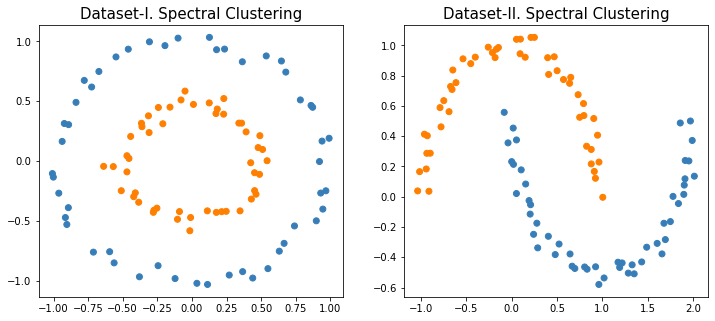

In [5]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2)
sc.fit(X1)
Y1_sc = sc.labels_ 
sc.fit(X2)
Y2_sc = sc.labels_

# Spectral Clustering
Y1_sc = spectral_cluster(X1, num_cluster=2)
Y2_sc = spectral_cluster(X2, num_cluster=2)
fig = plt.subplots(1, 2, figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_results(X1, Y1_sc, "Dataset-I. Spectral Clustering")
plt.subplot(1, 2, 2)
plot_results(X2, Y2_sc, "Dataset-II. Spectral Clustering")
plt.show()

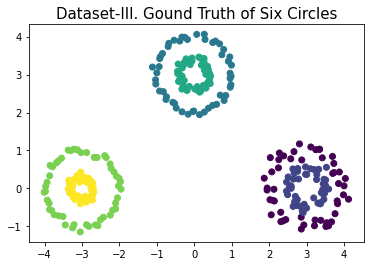

In [6]:
# Generate six circles with different factors and noise levels
from sklearn import datasets

x1, y1 = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1)
x2, y2 = datasets.make_circles(n_samples=100, factor=0.4, noise=0.05)
x3, y3 = datasets.make_circles(n_samples=100, factor=0.3, noise=0.05)

# Shift the circles along x-axis or y-axis
x1[:, 0] += 3
x2[:, 1] += 3
x3[:, 0] -= 3

# Stack the circles together
X3 = np.vstack((x1, x2, x3))
Y3 = np.hstack((1*(y1==0) + 2*(y1==1), 3*(y2==0) + 4*(y2==1), 5*(y3==0) + 6*(y3==1)))
dataset.append([X3, Y3])

# Plot the data
plt.scatter(X3[:, 0], X3[:, 1], c=Y3)
plt.title('Dataset-III. Gound Truth of Six Circles',fontsize=15)
plt.show()

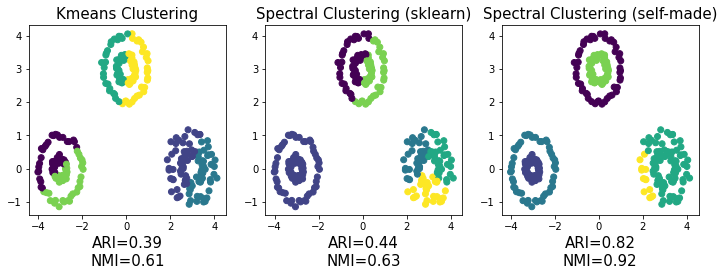

In [7]:
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn import metrics

# 1 - Kmeans clustering
km = KMeans(n_clusters=6)
km.fit(X3)
Y3_km = km.labels_

# 2 - Spectral Clustering (sklearn - default)
sc = SpectralClustering(n_clusters=6)
sc.fit(X3)
Y3_sc1 = sc.labels_ 

# 3 - Spectral Clustering (self-made)
Y3_sc2 = spectral_cluster(X3, num_cluster=6)

# Evaluation
ARI = [metrics.adjusted_rand_score(Y3, Y3_km), metrics.adjusted_rand_score(Y3, Y3_sc1), metrics.adjusted_rand_score(Y3, Y3_sc2)] 
NMI = [metrics.normalized_mutual_info_score(Y3, Y3_km), metrics.normalized_mutual_info_score(Y3, Y3_sc1), metrics.normalized_mutual_info_score(Y3, Y3_sc2)]

# Plot
fig = plt.subplots(1, 3, figsize=(12, 3.5))
plt.subplot(1, 3, 1)
plt.scatter(X3[:, 0], X3[:, 1], c=Y3_km)
plt.title('Kmeans Clustering',fontsize=15)
plt.xlabel(f"ARI={ARI[0]:.2f}\nNMI={NMI[0]:.2f}",fontsize=15)
plt.subplot(1, 3, 2)
plt.scatter(X3[:, 0], X3[:, 1], c=Y3_sc1)
plt.title('Spectral Clustering (sklearn)',fontsize=15)
plt.xlabel(f"ARI={ARI[1]:.2f}\nNMI={NMI[1]:.2f}",fontsize=15)
plt.subplot(1, 3, 3)
plt.scatter(X3[:, 0], X3[:, 1], c=Y3_sc2)
plt.title('Spectral Clustering (self-made)',fontsize=15)
plt.xlabel(f"ARI={ARI[2]:.2f}\nNMI={NMI[2]:.2f}",fontsize=15)
plt.show()